# Exemples de fonctions Pandas utiles pour le TP 1

## Importations des librairies utiles

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
print('numpy %s, pandas %s'%(np.__version__,pd.__version__))
print(os.getcwd())

#Eviter les warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from google.colab import files
data_to_load = files.upload()

numpy 2.0.2, pandas 2.2.2
/content


Saving iris.csv to iris.csv


## Creation depuis un CSV et affichage d'un Dataframe Pandas

In [5]:
my_dataframe = pd.read_csv('iris.csv', index_col=0)
my_dataframe
# display(my_dataframe)
# print("fin")


,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris
id_Iris,,,,,
23,NaN,NaN,1.4,0.2,0
104,4.9,3.0,1.4,0.2,0
18,4.7,3.2,1.3,0.2,0
49,4.6,3.1,1.5,0.2,0
123,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
124,6.7,3.0,5.2,2.3,2
44,6.3,2.5,5.0,1.9,2
69,6.5,3.0,NaN,2.0,2


## Transformation de l'ID en index

## Tri selon l'index

In [6]:
my_dataframe.sort_index(inplace=True) #Inplace permet de conserver les modification du DataFrame
my_dataframe

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris
id_Iris,,,,,
0,4.9,3.1,1.5,0.2,0
1,5.3,3.7,1.5,0.2,0
2,6.7,3.1,4.4,1.4,1
3,5.0,3.0,1.6,0.2,0
4,5.7,NaN,4.2,1.3,1
...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1
146,6.0,2.2,4.0,1.0,1
147,4.6,3.4,1.4,0.3,0


## Exploration des données / Importance des Features

In [7]:
my_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Longueur Sépale (cm)  142 non-null    float64
 1   Largeur Sépale (cm)   142 non-null    float64
 2   Longueur Pétale (cm)  143 non-null    float64
 3   Largeur Pétale (cm)   146 non-null    float64
 4   Type Iris             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [8]:
my_dataframe.describe()

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris
count,142.000000,142.000000,143.000000,146.000000,150.000000
mean,5.846479,3.049296,3.756643,1.208219,1.000000
std,0.840184,0.440784,1.748140,0.762709,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Calcul du quantile 0.9 (90% des valeurs sont dessous)
my_dataframe.quantile(0.9)

,0.9
Longueur Sépale (cm),6.9
Largeur Sépale (cm),3.6
Longueur Pétale (cm),5.7
Largeur Pétale (cm),2.2
Type Iris,2.0


### Création de catégories pour les tailles et ajout du nom de l'iris

In [10]:
# Créer une catégorie à partir des dimensions en cm
for taille in ["Longueur Sépale (cm)","Largeur Sépale (cm)","Longueur Pétale (cm)","Largeur Pétale (cm)"]:
    my_dataframe[taille.replace(" (cm)","")] = pd.qcut(my_dataframe[taille],3,['petit','moyen','grand'])

# Ajouter le dnom d'Iris à partir des dimensions en cm
my_dataframe['Nom Iris'] = my_dataframe['Type Iris'].map({
    0:'Setosa',
    1:'Versicolor',
    2:'Virginica',
})

# Affichage
display(my_dataframe)
my_dataframe.info()

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,,
0,4.9,3.1,1.5,0.2,0,petit,moyen,petit,petit,Setosa
1,5.3,3.7,1.5,0.2,0,petit,grand,petit,petit,Setosa
2,6.7,3.1,4.4,1.4,1,grand,moyen,moyen,moyen,Versicolor
3,5.0,3.0,1.6,0.2,0,petit,moyen,petit,petit,Setosa
4,5.7,NaN,4.2,1.3,1,moyen,NaN,moyen,moyen,Versicolor
...,...,...,...,...,...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1,grand,petit,moyen,moyen,Versicolor
146,6.0,2.2,4.0,1.0,1,moyen,petit,moyen,petit,Versicolor
147,4.6,3.4,1.4,0.3,0,petit,grand,petit,petit,Setosa


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Longueur Sépale (cm)  142 non-null    float64 
 1   Largeur Sépale (cm)   142 non-null    float64 
 2   Longueur Pétale (cm)  143 non-null    float64 
 3   Largeur Pétale (cm)   146 non-null    float64 
 4   Type Iris             150 non-null    int64   
 5   Longueur Sépale       142 non-null    category
 6   Largeur Sépale        142 non-null    category
 7   Longueur Pétale       143 non-null    category
 8   Largeur Pétale        146 non-null    category
 9   Nom Iris              150 non-null    object  
dtypes: category(4), float64(4), int64(1), object(1)
memory usage: 9.3+ KB


### Distribution des labels selon une feature

In [12]:
display(pd.crosstab(my_dataframe["Longueur Pétale"],my_dataframe["Nom Iris"]))
print("-"*50)
display(pd.crosstab(my_dataframe["Largeur Sépale"],my_dataframe["Nom Iris"]))

Nom Iris,Setosa,Versicolor,Virginica
Longueur Pétale,,,
petit,47,1,0
moyen,0,44,3
grand,0,4,44


--------------------------------------------------


Nom Iris,Setosa,Versicolor,Virginica
Largeur Sépale,,,
petit,1,27,19
moyen,15,19,21
grand,31,2,7


### Information Mutuelle

Identification des features catégoriques

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

studied_features = ["Longueur Sépale (cm)","Largeur Sépale (cm)","Longueur Pétale","Largeur Pétale"]
X = my_dataframe[studied_features].copy()
for colname in X.columns:
    if X[colname].dtypes=='category':
        X[colname], _ = X[colname].factorize() # transforme des catégories en nombre entier
    else:
        X[colname] = X[colname].fillna(X[colname].mean()) # Si numérique, Remplacement des valeurs vides par la moyenne.

discrete_features = X.dtypes == "int64" # "Génère la liste indiquant features discrets ou continus"
print("discrete_features:\n",discrete_features)


discrete_features:
 Longueur Sépale (cm)    False
Largeur Sépale (cm)     False
Longueur Pétale          True
Largeur Pétale           True
dtype: bool


Calcul des scores d'information mutuelle

In [14]:
mi_scores = mutual_info_regression(
    X,
    my_dataframe['Type Iris'],
    discrete_features=discrete_features
)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores


,MI Scores
Longueur Pétale,0.829223
Largeur Pétale,0.796510
Longueur Sépale (cm),0.491707
Largeur Sépale (cm),0.213107


Visualisation de l'information mutuelle

Text(0.5, 1.0, 'Mutual Information Scores')

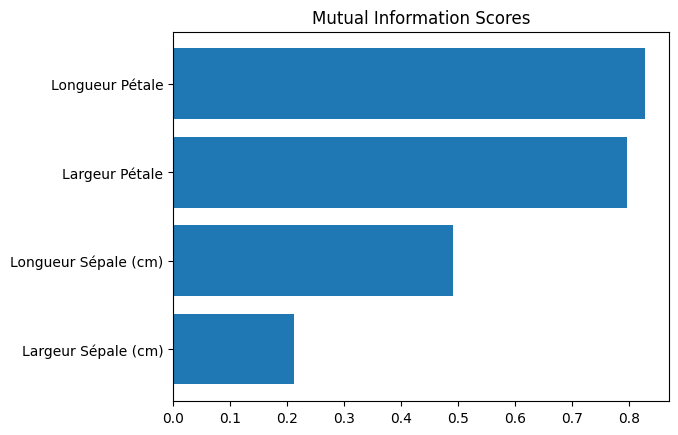

In [15]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")


## Filtrage des données

<Axes: >

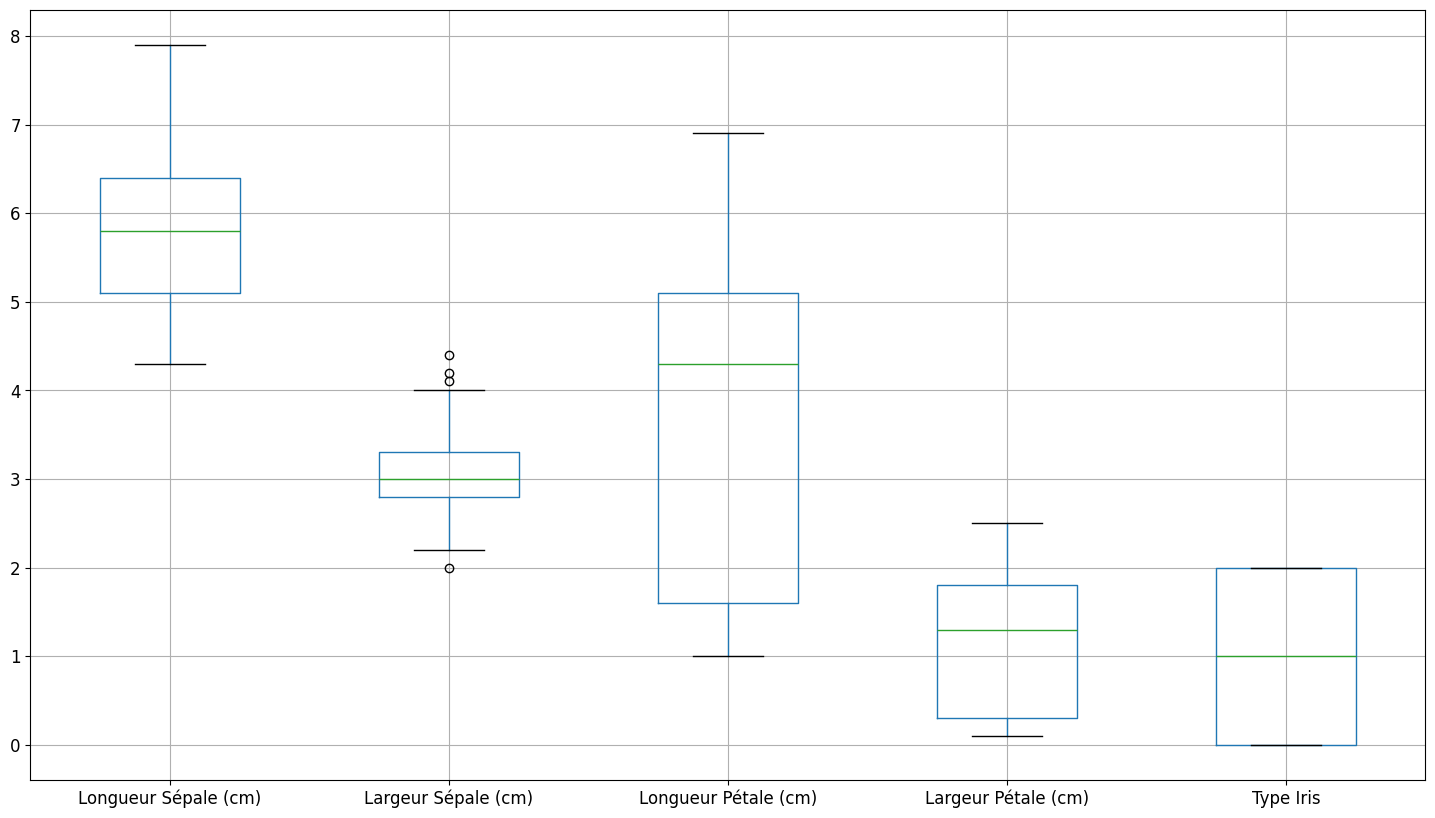

In [16]:
my_dataframe.boxplot(fontsize=12, figsize=(18,10))

Exclusion des outliers

Total: 150 Conservés: 138


<Axes: >

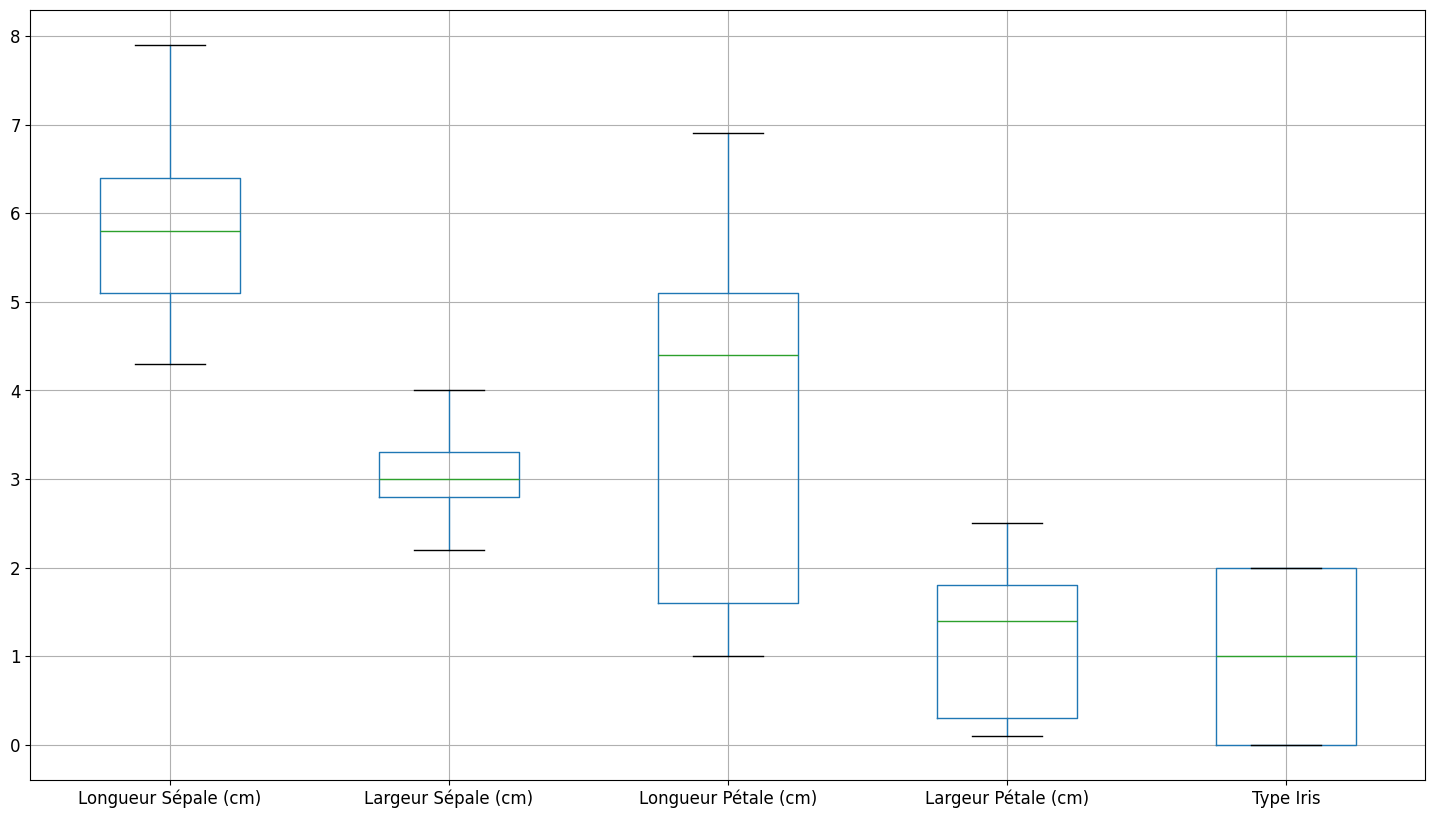

In [17]:
# filtered_dataframe
exclusion_outliers = my_dataframe["Largeur Sépale (cm)"].between(2.1,4)
print("Total:",len(exclusion_outliers), "Conservés:", exclusion_outliers.sum())
filtered_dataframe =  my_dataframe[exclusion_outliers]
filtered_dataframe.boxplot(fontsize=12, figsize=(18,10))

### Création d'un petit Dataframe avec des données manquantes dans "Longueur Sépale"

In [18]:
# Sélection des Iris avec Longueur Sépale indéfinie
small_df_na = my_dataframe[my_dataframe['Longueur Sépale (cm)'].isna()]

# Sélection aléatoire de 20 Iris avec Longueur Sépale définie
small_df_rnd = my_dataframe[~my_dataframe['Longueur Sépale (cm)'].isna()].sample(20, random_state=42)
my_dataframe[my_dataframe['Longueur Sépale (cm)'].isna()]
small_df = pd.concat([small_df_na,small_df_rnd]).sort_index()
small_df

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,,
12,5.5,4.2,1.4,0.2,0,moyen,grand,petit,petit,Setosa
18,4.7,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa
19,NaN,2.6,4.0,1.2,1,NaN,petit,moyen,moyen,Versicolor
20,5.2,4.1,1.5,0.1,0,petit,grand,petit,petit,Setosa
23,NaN,NaN,1.4,0.2,0,NaN,NaN,petit,petit,Setosa
29,6.7,3.1,5.6,2.4,2,grand,moyen,grand,grand,Virginica
33,NaN,3.1,4.9,1.5,1,NaN,moyen,grand,moyen,Versicolor
42,NaN,2.7,5.1,1.6,1,NaN,petit,grand,moyen,Versicolor
48,NaN,3.7,1.5,0.4,0,NaN,grand,petit,petit,Setosa


### Suppression des lignes avec des données manquantes

In [19]:
small_df[~small_df.isna().any(axis=1)]

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,,
12,5.5,4.2,1.4,0.2,0,moyen,grand,petit,petit,Setosa
18,4.7,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa
20,5.2,4.1,1.5,0.1,0,petit,grand,petit,petit,Setosa
29,6.7,3.1,5.6,2.4,2,grand,moyen,grand,grand,Virginica
56,6.2,3.4,5.4,2.3,2,moyen,grand,grand,grand,Virginica
61,6.9,3.1,5.4,2.1,2,grand,moyen,grand,grand,Virginica
70,6.0,3.4,4.5,1.6,1,moyen,grand,moyen,moyen,Versicolor
74,5.6,2.9,3.6,1.3,1,moyen,moyen,moyen,moyen,Versicolor
78,4.7,3.2,1.6,0.2,0,petit,moyen,petit,petit,Setosa


### Suppression d'une colonne

In [21]:
small_df.drop('Longueur Sépale (cm)', axis=1)

,Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,
12,4.2,1.4,0.2,0,moyen,grand,petit,petit,Setosa
18,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa
19,2.6,4.0,1.2,1,NaN,petit,moyen,moyen,Versicolor
20,4.1,1.5,0.1,0,petit,grand,petit,petit,Setosa
23,NaN,1.4,0.2,0,NaN,NaN,petit,petit,Setosa
29,3.1,5.6,2.4,2,grand,moyen,grand,grand,Virginica
33,3.1,4.9,1.5,1,NaN,moyen,grand,moyen,Versicolor
42,2.7,5.1,1.6,1,NaN,petit,grand,moyen,Versicolor
48,3.7,1.5,0.4,0,NaN,grand,petit,petit,Setosa


### Remplacement par la moyenne

In [22]:
fulfilled_small_df=small_df.copy()
fulfilled_small_df["Longueur Sépale (cm)"].fillna(small_df["Longueur Sépale (cm)"].mean(),inplace=True)
fulfilled_small_df

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,,
12,5.500,4.2,1.4,0.2,0,moyen,grand,petit,petit,Setosa
18,4.700,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa
19,5.975,2.6,4.0,1.2,1,NaN,petit,moyen,moyen,Versicolor
20,5.200,4.1,1.5,0.1,0,petit,grand,petit,petit,Setosa
23,5.975,NaN,1.4,0.2,0,NaN,NaN,petit,petit,Setosa
29,6.700,3.1,5.6,2.4,2,grand,moyen,grand,grand,Virginica
33,5.975,3.1,4.9,1.5,1,NaN,moyen,grand,moyen,Versicolor
42,5.975,2.7,5.1,1.6,1,NaN,petit,grand,moyen,Versicolor
48,5.975,3.7,1.5,0.4,0,NaN,grand,petit,petit,Setosa


## Gestion des données manquantes

### Interpolation linéaire

Régression linéaire entre Longueur Sépale et Longueur Pétale

---- filter_not_nan -----


,0
id_Iris,
12,True
18,True
19,False
20,True
23,False
29,True
33,False
42,False
48,False


---- x -----


array([[1.4],
       [1.3],
       [1.5],
       [5.6],
       [5.4],
       [5.4],
       [4.5],
       [1.6],
       [3.6],
       [1.6],
       [4.8],
       [5.7],
       [4.2],
       [4.3],
       [6.1],
       [4.8],
       [4. ],
       [6.7],
       [4.5]])

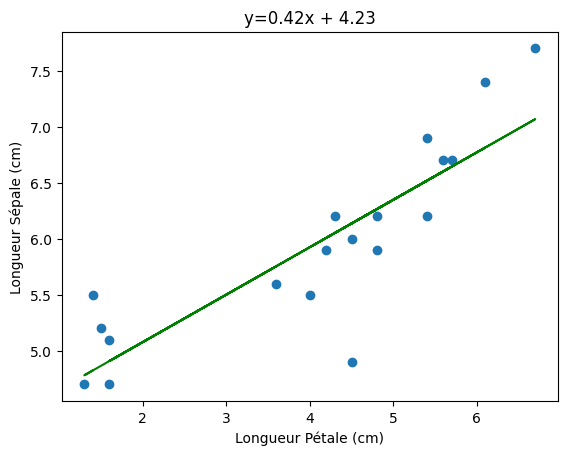

In [30]:
# Création d'un filtre pour sélectionner les valeurs non nulles
filter_not_nan = ~(small_df['Longueur Sépale (cm)'].isnull() | small_df['Longueur Pétale (cm)'].isnull())
print("---- filter_not_nan -----")
display(filter_not_nan)

# Création des deux variables X et y pour la régression
# reshape permet de créer "un tableau de tableau" pour le fit, car la méthode attend un nombre quelconque d'entrées dans x.
x = small_df.loc[filter_not_nan,'Longueur Pétale (cm)'].values.reshape(-1, 1)
print("---- x -----")
display(x)
y = small_df.loc[filter_not_nan,'Longueur Sépale (cm)']

# Création, appretissage et inférence du modèle de régression
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

# Visualisation
plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.xlabel("Longueur Pétale (cm)")
plt.ylabel("Longueur Sépale (cm)")
plt.title("y=%.2fx + %.2f" % (model.coef_, model.intercept_))
plt.show()


Création d'une interpolation pour les longueurs sépales manquante.

In [31]:
x_reg = small_df.loc[small_df['Longueur Sépale (cm)'].isnull() ,'Longueur Pétale (cm)'].values.reshape(-1, 1)
y_reg = model.predict(x_reg)
y_reg


array([5.92507956, 4.82400982, 6.30621909, 6.39091676, 4.86635865,
       6.77205629, 6.00977723, 4.78166098])

### Affichage des points calculé par régression linéaire

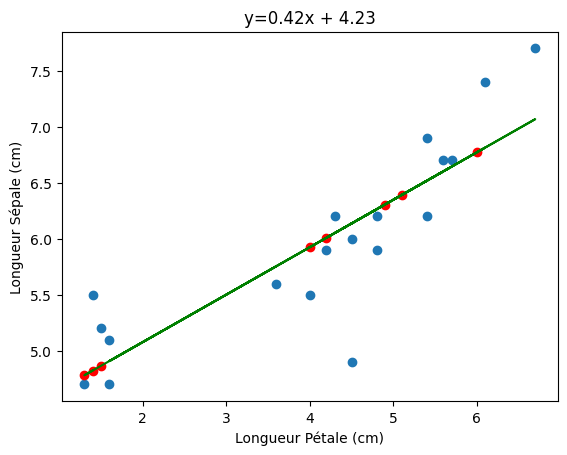

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris
id_Iris,,,,,,,,,,
12,5.500000,4.2,1.4,0.2,0,moyen,grand,petit,petit,Setosa
18,4.700000,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa
19,5.925080,2.6,4.0,1.2,1,NaN,petit,moyen,moyen,Versicolor
20,5.200000,4.1,1.5,0.1,0,petit,grand,petit,petit,Setosa
23,4.824010,NaN,1.4,0.2,0,NaN,NaN,petit,petit,Setosa
29,6.700000,3.1,5.6,2.4,2,grand,moyen,grand,grand,Virginica
33,6.306219,3.1,4.9,1.5,1,NaN,moyen,grand,moyen,Versicolor
42,6.390917,2.7,5.1,1.6,1,NaN,petit,grand,moyen,Versicolor
48,4.866359,3.7,1.5,0.4,0,NaN,grand,petit,petit,Setosa


In [25]:
plt.scatter(x, y)
plt.scatter(x_reg, y_reg, color='r')
plt.plot(x, y_predict, color='g')
plt.xlabel("Longueur Pétale (cm)")
plt.ylabel("Longueur Sépale (cm)")
plt.title("y=%.2fx + %.2f" % (model.coef_, model.intercept_))
plt.show()
fulfilled_small_df.loc[small_df['Longueur Sépale (cm)'].isnull() ,'Longueur Sépale (cm)'] = y_reg
fulfilled_small_df

## Créer des Features

### compter des conditions (nombre de grande dimension)

In [26]:
discrete_features = ["Longueur Sépale","Largeur Sépale","Longueur Pétale","Largeur Pétale"]
my_dataframe["nbGrand"] = (my_dataframe[discrete_features]=="grand").sum(axis=1)
display(my_dataframe.sample(5, random_state=42))
display(pd.crosstab(my_dataframe["nbGrand"],my_dataframe["Nom Iris"]))

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris,nbGrand
id_Iris,,,,,,,,,,,
73,5.4,3.9,1.7,0.4,0,petit,grand,petit,petit,Setosa,1
18,4.7,3.2,1.3,0.2,0,petit,moyen,petit,petit,Setosa,0
118,6.7,3.0,5.0,1.7,1,grand,moyen,grand,grand,Versicolor,3
78,4.7,3.2,1.6,0.2,0,petit,moyen,petit,petit,Setosa,0
76,5.1,3.5,1.4,0.3,0,petit,grand,petit,petit,Setosa,1


Nom Iris,Setosa,Versicolor,Virginica
nbGrand,,,
0,19,34,0
1,31,15,7
2,0,0,13
3,0,1,26
4,0,0,4


### Group & Transform : Ajouter la largeur moyenne de la pétale en fonction de sa catégorie de longueur

In [27]:
my_dataframe["Moy Largeur Pétale"] = (
    my_dataframe.groupby("Longueur Pétale") # Pour chaque catégorie de longueur de pétale.
    ["Largeur Pétale (cm)"]                 # Nous lisons la largeur de pétale...
    .transform("mean")                      # ...et nous calculons et ajoutons la moyenne
)
my_dataframe

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris,nbGrand,Moy Largeur Pétale
id_Iris,,,,,,,,,,,,
0,4.9,3.1,1.5,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870
1,5.3,3.7,1.5,0.2,0,petit,grand,petit,petit,Setosa,1,0.260870
2,6.7,3.1,4.4,1.4,1,grand,moyen,moyen,moyen,Versicolor,1,1.336957
3,5.0,3.0,1.6,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870
4,5.7,NaN,4.2,1.3,1,moyen,NaN,moyen,moyen,Versicolor,0,1.336957
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1,grand,petit,moyen,moyen,Versicolor,1,1.336957
146,6.0,2.2,4.0,1.0,1,moyen,petit,moyen,petit,Versicolor,0,1.336957
147,4.6,3.4,1.4,0.3,0,petit,grand,petit,petit,Setosa,1,0.260870


## Target Encoding

#### Sans lissage

In [28]:
my_dataframe["Moy Type Iris"] = (
    my_dataframe.groupby("Longueur Pétale")  # Pour chaque catégorie de longueur de pétale.
    ["Type Iris"]                            # Nous lisons le label
    .transform("mean")                       #... et nous calculons et ajoutons la moyenne
)
my_dataframe

,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris,nbGrand,Moy Largeur Pétale,Moy Type Iris
id_Iris,,,,,,,,,,,,,
0,4.9,3.1,1.5,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870,0.020833
1,5.3,3.7,1.5,0.2,0,petit,grand,petit,petit,Setosa,1,0.260870,0.020833
2,6.7,3.1,4.4,1.4,1,grand,moyen,moyen,moyen,Versicolor,1,1.336957,1.063830
3,5.0,3.0,1.6,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870,0.020833
4,5.7,NaN,4.2,1.3,1,moyen,NaN,moyen,moyen,Versicolor,0,1.336957,1.063830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1,grand,petit,moyen,moyen,Versicolor,1,1.336957,1.063830
146,6.0,2.2,4.0,1.0,1,moyen,petit,moyen,petit,Versicolor,0,1.336957,1.063830
147,4.6,3.4,1.4,0.3,0,petit,grand,petit,petit,Setosa,1,0.260870,0.020833


### Avec Lissage

In [29]:
# Facteur de lissage = 100
coef = 150/(150 + 100)
my_dataframe["Moy Type Iris"] = coef * my_dataframe["Moy Type Iris"] + (1-coef) * my_dataframe["Type Iris"].mean()
my_dataframe["Moy Type Iris"]
my_dataframe


,Longueur Sépale (cm),Largeur Sépale (cm),Longueur Pétale (cm),Largeur Pétale (cm),Type Iris,Longueur Sépale,Largeur Sépale,Longueur Pétale,Largeur Pétale,Nom Iris,nbGrand,Moy Largeur Pétale,Moy Type Iris
id_Iris,,,,,,,,,,,,,
0,4.9,3.1,1.5,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870,0.412500
1,5.3,3.7,1.5,0.2,0,petit,grand,petit,petit,Setosa,1,0.260870,0.412500
2,6.7,3.1,4.4,1.4,1,grand,moyen,moyen,moyen,Versicolor,1,1.336957,1.038298
3,5.0,3.0,1.6,0.2,0,petit,moyen,petit,petit,Setosa,0,0.260870,0.412500
4,5.7,NaN,4.2,1.3,1,moyen,NaN,moyen,moyen,Versicolor,0,1.336957,1.038298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1,grand,petit,moyen,moyen,Versicolor,1,1.336957,1.038298
146,6.0,2.2,4.0,1.0,1,moyen,petit,moyen,petit,Versicolor,0,1.336957,1.038298
147,4.6,3.4,1.4,0.3,0,petit,grand,petit,petit,Setosa,1,0.260870,0.412500
